In [2]:
import tensorflow as tf
import numpy as np
from keras.optimizers import Adam, SGD
from keras.layers import *
from keras.models import *
from keras.utils import plot_model
import matplotlib.pyplot as plt


C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\tensorflow\pyth

In [3]:
test_data=np.reshape(np.arange(0,8*20*20*2), (8, 20, 20, 2)) #後=前 (張, x , y, chanel)
test_data.shape

#筆資料.R.C.channel

#把np.arange(0,8*20*20*2) reshape成(8, 20, 20, 2)
#np.arange(0,8*20*20*2)
#[   0    1    2 ... 6397 6398 6399]

(8, 20, 20, 2)

In [4]:
#1 Flatten Dense
model=Sequential()
model.add(Flatten())

In [5]:
output=model.predict(test_data)
output.shape
#pridict & pridict_class https://blog.csdn.net/tszupup/article/details/85275111

#predict 打印概率
# [[3.3745366e-01 2.2980917e-02 2.0197949e-03 1.2046755e-02 1.9850987e-03
#   1.3152690e-04 4.0220530e-03 1.3779138e-03 5.9722424e-01 2.0758053e-02]

#pridict_class 最大概率对应的标签 
# [8 2 3]

(8, 800)

In [8]:
model=Sequential()
model.add(Flatten())
model.add(Dense(50, input_dim=(800,))) #800後面接張數,此處為8,不寫才不會因為寫錯而crash

#input_dim = input_shape(input_dim,)
#input_dim=784，說明輸入是一個784維的向量，這相當於一個一階的張量，它的shape就是(784,)
#shape
#[1,2,3]的shape是(3,); [[1,2,3],[4,5,6]]的shape是(2,3);[[[1],[2],[3]],[[4],[5],[6]]]的shape是(2,3,1)

In [9]:
output=model.predict(test_data) #predict做上面的事
output.shape

(8, 50)

In [10]:
#2 Flatten Dense Activation
model=Sequential()
model.add(Flatten())
model.add(Dense(50, input_dim=(800,)))
model.add(Activation('sigmoid'))

In [11]:
output=model.predict(test_data)
output.shape

(8, 50)

In [12]:
#3
input_layer=Input(shape=(20,20,2))
x=Flatten()(input_layer)
x=Dense(50)(x)
output=Activation('sigmoid')(x)
model=Model(inputs=input_layer, outputs=output)  #input_layer入 output出


In [13]:
output=model.predict(test_data)
output.shape

(8, 50)

In [14]:
test_data2=np.reshape(np.arange(0,8*50), (8,50))

input_layer1=Input(shape=(20,20,2))
input_layer2=Input(shape=(50,))
x=Flatten()(input_layer1) #壓平得vector 20*20*2=800
output1=Dense(50)(x)  #8*50

x=Multiply()([output1, input_layer2]) #拿8*50和input_layer2 #全連接層+50 cell 得 800*50=40000參數

x=Dense(100)(output1) 
output2=Activation('sigmoid')(x)

model=Model(inputs=[input_layer1, input_layer2], outputs=[output1, output2])

#計算輸入張量列表的（逐元素間的）乘積
#2比1更有彈性

In [15]:
output=model.predict([test_data, test_data2])
print('output 1 shape: {} ; output 2 shape: {}'.format(output[0].shape, output[1].shape))

output 1 shape: (8, 50) ; output 2 shape: (8, 100)


# Quiz time:   How many parameters in this model??????

In [16]:
input_layer=Input(shape=(20,20,2))
x=Flatten()(input_layer)
x=Dense(50)(x)
x=Dropout(0.2)(x) #隨機隱藏
output=Activation('linear')(x)
model=Model(inputs=input_layer, outputs=output)

model.compile(optimizer='Adam', metrics=['accuracy'], loss=['mse'])

W0827 16:47:24.341460  7508 deprecation.py:506] From C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0827 16:47:24.358464  7508 deprecation_wrapper.py:119] From C:\Users\Sophie\Anaconda3\envs\py3.6\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [17]:
model.fit(test_data, test_data2, epochs=20, batch_size=2)

# epoch：1個epoch表示過了1遍訓練集中的所有樣本
# batch-size：1次迭代所使用的樣本量

Epoch 1/20
8/8 [==============================] - 0s 15ms/step - loss: 7451788.4375 - acc: 0.0000e+00
Epoch 2/20
8/8 [==============================] - 0s 625us/step - loss: 5660501.5625 - acc: 0.0000e+00
Epoch 3/20
8/8 [==============================] - 0s 626us/step - loss: 3637223.1641 - acc: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 0s 623us/step - loss: 3551602.5938 - acc: 0.0000e+00
Epoch 5/20
8/8 [==============================] - 0s 874us/step - loss: 2172368.0820 - acc: 0.0000e+00
Epoch 6/20
8/8 [==============================] - 0s 875us/step - loss: 3902564.6875 - acc: 0.0000e+00
Epoch 7/20
8/8 [==============================] - 0s 623us/step - loss: 1553329.7930 - acc: 0.0000e+00
Epoch 8/20
8/8 [==============================] - 0s 874us/step - loss: 3022085.5000 - acc: 0.0000e+00
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 1137320.6641 - acc: 0.0000e+00
Epoch 10/20
8/8 [==============================] - 0s 999us/step - loss: 117

In [19]:
input_layer=Input(shape=(20,20,2))
x=Flatten()(input_layer)

output=Dense(50, activation='linear', use_bias=False, kernel_initializer='glorot_uniform'\
             , bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None\
             , activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(x)

model=Model(inputs=input_layer, outputs=output)
model.summary()

#20*20*2*50
#若b=fault 則不加50
#Bias即所謂的Underfitting，因為參數過少連Training set都會有頗大的預測誤差
#Variance即所謂的Overfitting，因為參數過多導致過度符合Training set的資料特性，使得其無法預測較為普遍的資料集


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 20, 20, 2)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                40000     
Total params: 40,000
Trainable params: 40,000
Non-trainable params: 0
_________________________________________________________________


# RNN

In [20]:
input_layer=Input(shape=(20,20,2))

x=Reshape((8,100))(input_layer)
output=SimpleRNN(50)(x)

model=Model(inputs=input_layer, outputs=output)
#(100+50)*50+50

In [21]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 20, 20, 2)         0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 100)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                7550      
Total params: 7,550
Trainable params: 7,550
Non-trainable params: 0
_________________________________________________________________


In [58]:
input_layer=Input(shape=(20,20,2))

x=Reshape((8,100))(input_layer)
output=SimpleRNN(50, use_bias=False, return_sequences=True, return_state=True, stateful=False)(x)

model=Model(inputs=input_layer, outputs=output)

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 20, 20, 2)         0         
_________________________________________________________________
reshape_12 (Reshape)         (None, 8, 100)            0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    [(None, 8, 50), (None, 50 7500      
Total params: 7,500
Trainable params: 7,500
Non-trainable params: 0
_________________________________________________________________


In [64]:
input_layer=Input(shape=(20,20,2))

x=Reshape((8,100))(input_layer)
output=LSTM(50, use_bias=True, return_sequences=False, return_state=False, stateful=False)(x)

model=Model(inputs=input_layer, outputs=output)

#return_sequences：默認False。在輸出序列中，返回單個hidden state值還是返回全部time step的hidden state值。False返回單個， true返回全部。
#return_state：默認False。是否返回除輸出之外的最後一個狀態。


# Quiz time:   How many parameters in this model??????

In [65]:
model.summary()
#上*4

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 20, 20, 2)         0         
_________________________________________________________________
reshape_15 (Reshape)         (None, 8, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
Total params: 30,200
Trainable params: 30,200
Non-trainable params: 0
_________________________________________________________________


In [66]:
input_layer=Input(shape=(20,20,2))

x=Reshape((8,100))(input_layer)
output=GRU(50, use_bias=True, return_sequences=False, return_state=False, stateful=False)(x)

model=Model(inputs=input_layer, outputs=output)


# Quiz time:   How many parameters in this model??????

In [67]:
model.summary()
#上*3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 20, 20, 2)         0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 8, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                22650     
Total params: 22,650
Trainable params: 22,650
Non-trainable params: 0
_________________________________________________________________


# CNN

In [104]:
input_layer=Input(shape=(64,64,3))

output=Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=None\
         , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None\
         , bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(input_layer)


model=Model(inputs=input_layer, outputs=output)

#dilation_rate &  strides 差別:前面中間也有掃 後者是放大跳過
#不管照片大小 只管filter


In [105]:
model.summary()
#3*3*3*32+32

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [106]:
input_layer=Input(shape=(128,128,32))

output=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=None\
         , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None\
         , bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(input_layer)


model=Model(inputs=input_layer, outputs=output)

# Quiz time:   How many parameters in this model??????

In [107]:
model.summary()
#32*9*128+128   ?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 128, 128)     36992     
Total params: 36,992
Trainable params: 36,992
Non-trainable params: 0
_________________________________________________________________


In [123]:
input_layer=Input(shape=(128,128,32))

output=DepthwiseConv2D(            kernel_size=(3,3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=None\
         , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None\
         , bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(input_layer)


model=Model(inputs=input_layer, outputs=output)

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        (None, 128, 128, 32)      0         
_________________________________________________________________
depthwise_conv2d_3 (Depthwis (None, 128, 128, 32)      320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [121]:
input_layer=Input(shape=(128,128,32))

output=SeparableConv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same', dilation_rate=(1, 1), activation=None\
         , use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None\
         , bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(input_layer)


model=Model(inputs=input_layer, outputs=output)

In [122]:
model.summary()
#(3*3+128)*8  ?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        (None, 128, 128, 32)      0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 128, 128, 128)     4512      
Total params: 4,512
Trainable params: 4,512
Non-trainable params: 0
_________________________________________________________________


In [130]:
input_layer=Input(shape=(128,128,32))

x=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same')(input_layer)
output=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(x)

model=Model(inputs=input_layer, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 128)     36992     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 128)       0         
Total params: 36,992
Trainable params: 36,992
Non-trainable params: 0
_________________________________________________________________


In [131]:
input_layer=Input(shape=(128,128,32))

x=Conv2D(filters=128, kernel_size=(3,3), strides=(1, 1), padding='same')(input_layer)
output=GlobalAveragePooling2D()(x)

model=Model(inputs=input_layer, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 128)     36992     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
Total params: 36,992
Trainable params: 36,992
Non-trainable params: 0
_________________________________________________________________


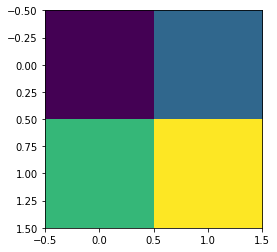

In [158]:
test_data=np.reshape(np.array([[1,2], [3,4]]), (1,2,2)) #(1,2,2)=(1,2,2,1)
test_data
plt.imshow(test_data[0]) #test_data[0]第一筆 imshow裡的值

In [155]:
input_layer=Input(shape=(2,2))

x=Reshape((2,2,1))(input_layer)
output=UpSampling2D((2,2))(x)

model=Model(inputs=input_layer, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_86 (InputLayer)        (None, 2, 2)              0         
_________________________________________________________________
reshape_19 (Reshape)         (None, 2, 2, 1)           0         
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 4, 4, 1)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


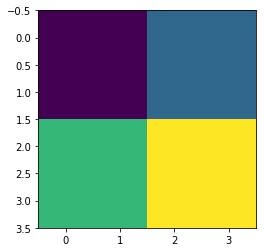

In [160]:
output_data=model.predict(test_data)
output_data=np.reshape(output_data, (4,4))
plt.imshow(output_data)

In [169]:
input_layer=Input(shape=(2,2))

x=Reshape((2,2,1))(input_layer)
output=Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(1, 1), padding='valid', output_padding=None\
                       , data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True\
                       , kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None\
                       , bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)(x)

model=Model(inputs=input_layer, outputs=output)
model.summary()

#3*3+1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_91 (InputLayer)        (None, 2, 2)              0         
_________________________________________________________________
reshape_24 (Reshape)         (None, 2, 2, 1)           0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 4, 4, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


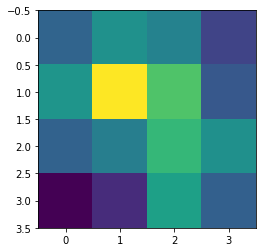

In [170]:
output_data=model.predict(test_data)
output_data=np.reshape(output_data, (4,4))
plt.imshow(output_data)